Dung Nguyen

Advanced Data Analytics - D213 

TASK 2: SENTIMENT ANALYSIS USING NEURAL NETWORKS

**Introduction:**

In your previous coursework, you have explored a variety of supervised and unsupervised data mining models. You have seen the power of using data analytical techniques to help organizations make data-driven decisions and now want to extend these models into areas of machine learning and artificial intelligence. In this course, you will explore the use of neural networks and natural language processing (NLP).

In this task, you will choose a data file from the Web Links section. The available data sets are as follows:

•  Amazon Product Data set

•  UCSD Recommender Systems Data sets

•  UCI Sentiment Labeled Sentences Data set

For this task, you will build a neural network designed to learn word usage and context using NLP techniques. You will provide visualizations and a report, as well as build your network in an interactive development environment.

# Part 1: Research Question

**A1. Research Question:**

Can we use neural networks and specifically Natural Language Processing (NLP) to predict the view of future customer reviews by the past sentiment labeled datasets?

**A2. The goal of the data analysis:**

In this assignment, we will use the Python TensorFlow package to build the model to predict the sentiment of future customer reviews by the past given labeled datasets. The data analysis goals included analyzing and understanding the customers by identifying the customer's preferred product from positive product reviews.

**A3. Type of neural network:**

"Sentiment analysis focuses on the polarity of a text (positive, negative, neutral), but it also goes beyond polarity to detect specific feelings and emotions (angry, happy, sad, etc.), urgency (urgent, not urgent), and even intentions (interested v. not interested)." (MonkeyLearn, n.d)

I will use the Python TensorFlow and Keras libraries for this Natural Language Processing (NLP) model because the sentiment analysis with an NLP model will be the best tool for interpreting the emotions behind text data. The data analysis goals are to build the model to predict the sentiment of future customer reviews by the past given labeled datasets. In addition, the business can understand the customers by identifying the customer's preferred product from positive product reviews. 

# Part 2: Data Preparation

**B1. Data Exploration**

I will use three labeled datasets from Amazon, IMDB, and Yelp and combine them into one data frame for the analysis process. They are:
* Amazon Product Data set
* UCSD Recommender Systems Data sets
* UCI Sentiment Labeled Sentences Data set

In [1]:
#1. Install necessary packages
!pip install pandas
!pip install numpy
!pip install seaborn

# Install pmdarima
!pip install pmdarima

!pip install tensorflow

# Notebook presentation slides
!pip install RISE

# Install textblob for spelling corrections
!pip install textblob


In [2]:
# Ignor warning error
import warnings
warnings.filterwarnings('ignore')

# Import standard libraries 
import numpy as np # linear algebra
import pandas as pd # dataset processing
from pandas import Series, DataFrame

# Import visualization packages
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Import TensorFlow package
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import callbacks
from tensorflow import keras

# Import parser
from dateutil.parser import parse

#Spelling corrections
import textblob

# Import reduce
from functools import reduce

# Import bag count vectorizer function
from sklearn.feature_extraction.text import CountVectorizer

# Import appropriate tokenize function
import nltk
from nltk import word_tokenize
nltk.download('punkt')

# Import nltk 'stopwords' functions
nltk.download('stopwords')
from nltk.corpus import stopwords

#Import EarlyStopping
import tensorflow
from keras.callbacks import ModelCheckpoint, EarlyStopping

[nltk_data] Downloading package punkt to C:\Users\Chris
[nltk_data]     McGee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Chris
[nltk_data]     McGee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#2. Load data set into Pandas data frame
amazon_path = 'amazon_cells_labelled.txt'
amazon_df_original = pd.read_csv(amazon_path, names = ['review', 'sentiments'], sep = '\t')

imdb_path = 'imdb_labelled.txt'
imdb_df_original = pd.read_csv(imdb_path, names = ['review', 'sentiments'], sep = '\t')

yelp_path = 'yelp_labelled.txt'
yelp_df_original = pd.read_csv(yelp_path, names = ['review', 'sentiments'], sep = '\t')

In [4]:
#3. Display data frame
amazon_df = amazon_df_original.copy()
imdb_df = imdb_df_original.copy()
yelp_df = yelp_df_original.copy()

In [5]:
#review data
print('Amazon: ', amazon_df.head(15))
print('IMDB: ', imdb_df.head(15))
print('Yelp: ', yelp_df.head(15))

Amazon:                                                 review  sentiments
0   So there is no way for me to plug it in here i...           0
1                         Good case, Excellent value.           1
2                              Great for the jawbone.           1
3   Tied to charger for conversations lasting more...           0
4                                   The mic is great.           1
5   I have to jiggle the plug to get it to line up...           0
6   If you have several dozen or several hundred c...           0
7         If you are Razr owner...you must have this!           1
8                 Needless to say, I wasted my money.           0
9                    What a waste of money and time!.           0
10                    And the sound quality is great.           1
11  He was very impressed when going from the orig...           1
12  If the two were seperated by a mere 5+ ft I st...           0
13                           Very good quality though           1
1

In [6]:
#4. Evaluate the data structure to understand input data better
# Dataset size
print('Amazon: ', amazon_df.shape)
print('IMDB: ', imdb_df.shape)
print('Yelp: ', yelp_df.shape)

Amazon:  (1000, 2)
IMDB:  (748, 2)
Yelp:  (1000, 2)


In [7]:
# Review individual DataFrames info - Amazon
amazon_df.info

<bound method DataFrame.info of                                                 review  sentiments
0    So there is no way for me to plug it in here i...           0
1                          Good case, Excellent value.           1
2                               Great for the jawbone.           1
3    Tied to charger for conversations lasting more...           0
4                                    The mic is great.           1
..                                                 ...         ...
995  The screen does get smudged easily because it ...           0
996  What a piece of junk.. I lose more calls on th...           0
997                       Item Does Not Match Picture.           0
998  The only thing that disappoint me is the infra...           0
999  You can not answer calls with the unit, never ...           0

[1000 rows x 2 columns]>

In [8]:
# Review individual DataFrames info - IMDB
print('IMDB: ', imdb_df.shape)
imdb_df.info

IMDB:  (748, 2)


<bound method DataFrame.info of                                                 review  sentiments
0    A very, very, very slow-moving, aimless movie ...           0
1    Not sure who was more lost - the flat characte...           0
2    Attempting artiness with black & white and cle...           0
3         Very little music or anything to speak of.             0
4    The best scene in the movie was when Gerardo i...           1
..                                                 ...         ...
743  I just got bored watching Jessice Lange take h...           0
744  Unfortunately, any virtue in this film's produ...           0
745                   In a word, it is embarrassing.             0
746                               Exceptionally bad!             0
747  All in all its an insult to one's intelligence...           0

[748 rows x 2 columns]>

In [9]:
# Review individual DataFrames info - Yelp
print('Yelp: ', yelp_df.shape)
yelp_df.info

Yelp:  (1000, 2)


<bound method DataFrame.info of                                                 review  sentiments
0                             Wow... Loved this place.           1
1                                   Crust is not good.           0
2            Not tasty and the texture was just nasty.           0
3    Stopped by during the late May bank holiday of...           1
4    The selection on the menu was great and so wer...           1
..                                                 ...         ...
995  I think food should have flavor and texture an...           0
996                           Appetite instantly gone.           0
997  Overall I was not impressed and would not go b...           0
998  The whole experience was underwhelming, and I ...           0
999  Then, as if I hadn't wasted enough of my life ...           0

[1000 rows x 2 columns]>

In [10]:
#5. Combine the three review labeled files
#list of the combine data frame
new_dataframes = [amazon_df, imdb_df, yelp_df]

# Import reduce
from functools import reduce

# Combine the three DataFrames into one
combine_df = reduce(lambda left,right: pd.merge(left,right, on = ['review', 'sentiments'], how = 'outer'), new_dataframes)

# Check the combined data frames
combine_df

,review,sentiments
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [11]:
#6. Re-validate column, null values, and find missing values.
# check null values
df = combine_df
data_nulls = df.isnull().sum()
print(data_nulls)

# Remove our nulls
#df = df.dropna(subset=['review'])

review        0
sentiments    0
dtype: int64


In [12]:
# check missing data and its size
def missing_cols(combine_df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in combine_df.columns:
        missing_vals = combine_df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {combine_df[col].isnull().sum()}")
    
    if total == 0:
        print("There are no missing values left")
            
missing_cols(combine_df)

There are no missing values left


In [13]:
#7. Check combined data frame info
combine_df.info

<bound method DataFrame.info of                                                  review  sentiments
0     So there is no way for me to plug it in here i...           0
1                           Good case, Excellent value.           1
2                                Great for the jawbone.           1
3     Tied to charger for conversations lasting more...           0
4                                     The mic is great.           1
...                                                 ...         ...
2743  I think food should have flavor and texture an...           0
2744                           Appetite instantly gone.           0
2745  Overall I was not impressed and would not go b...           0
2746  The whole experience was underwhelming, and I ...           0
2747  Then, as if I hadn't wasted enough of my life ...           0

[2748 rows x 2 columns]>

In [14]:
# Check combined data frame columns
combine_df.columns

Index(['review', 'sentiments'], dtype='object')

In [15]:
# Check combined data frame type
type(combine_df)

pandas.core.frame.DataFrame

In [16]:
# Check data types of features
combine_df.dtypes

review        object
sentiments     int64
dtype: object

In [17]:
# Check binary rating (0 = negative, 1 = positive)
combine_df.sentiments.unique()

array([0, 1], dtype=int64)

In [18]:
# Check positive and negative reviews from combined DataFrame
print('Combine data - Count:\n ', combine_df.sentiments.value_counts())
print('\n Combine data - Percentage:\n', combine_df.sentiments.value_counts() / len(combine_df))

Combine data - Count:
  1    1386
0    1362
Name: sentiments, dtype: int64

 Combine data - Percentage:
 1    0.504367
0    0.495633
Name: sentiments, dtype: float64


<AxesSubplot:>

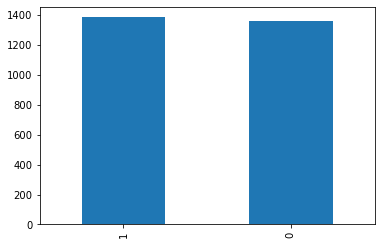

In [19]:
# Distribution of the ratings - sentiments
combine_df['sentiments'].value_counts().plot(kind='bar')

In [20]:
# Describe dataset statistics
combine_df.describe()

,sentiments
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [21]:
# Checking for emoji "":D""
for i in combine_df.review:
    substring = ":)"
    if substring in i:
        print("The line contains :D emoji")

The line contains :D emoji
The line contains :D emoji
The line contains :D emoji
The line contains :D emoji


In [22]:
# Check for unusual characters
def isEnglish(review):
    return review.isascii()
for i in combine_df.review:
    if isEnglish(i) != True:
        print(isEnglish(i))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [23]:
# Check vocabulary size, proposed word embedding length
# Find lengths of reviews
reviews_length = combine_df.review.str.len()
reviews_length

0        82
1        27
2        22
3        79
4        17
       ... 
2743     66
2744     24
2745     50
2746     91
2747    134
Name: review, Length: 2748, dtype: int64

In [24]:
#Find estimation of vocabulary size; how many unique words are there within the DataFrame
unique_word = set(combine_df['review'].str.replace('[^a-zA-Z]', '').str.lower().str.split(' ').sum())

# Check the length of unique words
print('There are ', str(len(unique_word)), ' unique words in the review column of combine dataframe.')

There are  2717  unique words in the review column of combine dataframe.


In [25]:
# Check the length of the shortest review
print('The shortest review is ', str(min(reviews_length)),' words')

The shortest review is  7  words


In [26]:
# Check the length of the longest review
print('The longest review is ', str(max(reviews_length)),' words')

The longest review is  7944  words


In [27]:
# Total length of all reviews
sum(reviews_length)

196560

In [28]:
#8. Tokenize words
# Import appropriate tokenize function
import nltk
from nltk import word_tokenize

In [29]:
#tokenize the text of the review
word_tokens = [word_tokenize(review) for review in combine_df.review]

# Print first ten  reviews
print('Word Tokenization firs 10 reviews results:')
print(word_tokens[:10])

Word Tokenization firs 10 reviews results:
[['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter', '.'], ['Good', 'case', ',', 'Excellent', 'value', '.'], ['Great', 'for', 'the', 'jawbone', '.'], ['Tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes.MAJOR', 'PROBLEMS', '!', '!'], ['The', 'mic', 'is', 'great', '.'], ['I', 'have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent', 'volume', '.'], ['If', 'you', 'have', 'several', 'dozen', 'or', 'several', 'hundred', 'contacts', ',', 'then', 'imagine', 'the', 'fun', 'of', 'sending', 'each', 'of', 'them', 'one', 'by', 'one', '.'], ['If', 'you', 'are', 'Razr', 'owner', '...', 'you', 'must', 'have', 'this', '!'], ['Needless', 'to', 'say', ',', 'I', 'wasted', 'my', 'money', '.'], ['What', 'a', 'waste', 'of', 'money', 'and', 'time', '!', '.']]


In [30]:
#Check word_tokens type
type(word_tokens)

list

In [31]:
#Check sample review #6
combine_df.review[6]

'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.'

In [32]:
#Count words in the reviews column
combine_df['word_count'] = combine_df['review'].str.split().str.len()
combine_df.head()

,review,sentiments,word_count
0,So there is no way for me to plug it in here i...,0,21
1,"Good case, Excellent value.",1,4
2,Great for the jawbone.,1,4
3,Tied to charger for conversations lasting more...,0,11
4,The mic is great.,1,4


In [33]:
#Average word count in the reviews
print('The average of ' + str(combine_df['word_count'].mean()) + ' word per customer review.' )

The average of 13.006550218340612 word per customer review.


In [34]:
# Count how many tokens in each tokenized review
tokens_lengh = []

# Iterate over the word_tokens list
for i in range(len(word_tokens)):
    tokens_lengh.append(len(word_tokens[i]))
    
# New 'tokens_count' feature for the length of each review
combine_df['tokens_count'] = tokens_lengh

#review
combine_df.head()

,review,sentiments,word_count,tokens_count
0,So there is no way for me to plug it in here i...,0,21,22
1,"Good case, Excellent value.",1,4,6
2,Great for the jawbone.,1,4,5
3,Tied to charger for conversations lasting more...,0,11,13
4,The mic is great.,1,4,5


In [35]:
#Replace all capital with lowercase letters
combine_df['clean_review'] = combine_df.review.apply(lambda x: " ".join(x.lower() for x in x.split()))

#combine_df['clean_review'] = combine_df['review'].str.lower()

In [36]:
#Remove all numbers from clean_review
combine_df['clean_review'] = combine_df['clean_review'].str.replace('\d+','')

combine_df.head()

,review,sentiments,word_count,tokens_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,22,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,4,6,"good case, excellent value."
2,Great for the jawbone.,1,4,5,great for the jawbone.
3,Tied to charger for conversations lasting more...,0,11,13,tied to charger for conversations lasting more...
4,The mic is great.,1,4,5,the mic is great.


In [37]:
# Select special characters
unique_character = ["*","+",",","-",".","/",":",";","<",
 "=",">","?","@","!",'"',"#","%","&","'","(",")","[","\\","]","^","_",
 "`","{","|","}","~","–"]

In [38]:
# Replace all special characters
for char in unique_character:
 combine_df['clean_review'] = combine_df['clean_review'].str.replace(char, ' ',regex=True)

#Remove Punctuation
#combine_df['clean_review'] = combine_df['clean_review'].str.replace('[^\w\s]', '')

combine_df.head()

,review,sentiments,word_count,tokens_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,22,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,4,6,good case excellent value
2,Great for the jawbone.,1,4,5,great for the jawbone
3,Tied to charger for conversations lasting more...,0,11,13,tied to charger for conversations lasting more...
4,The mic is great.,1,4,5,the mic is great


In [39]:
# Import nltk functions, load stopwords
#nltk.download('stopwords')
#from nltk.corpus import stopwords

In [40]:
# Remove stop words
stop_word = stopwords.words('english')
combine_df['clean_review'] = combine_df['clean_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))
combine_df

,review,sentiments,word_count,tokens_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,22,way plug us unless go converter
1,"Good case, Excellent value.",1,4,6,good case excellent value
2,Great for the jawbone.,1,4,5,great jawbone
3,Tied to charger for conversations lasting more...,0,11,13,tied charger conversations lasting minutes maj...
4,The mic is great.,1,4,5,mic great
...,...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,13,think food flavor texture lacking
2744,Appetite instantly gone.,0,3,4,appetite instantly gone
2745,Overall I was not impressed and would not go b...,0,10,11,overall impressed would go back
2746,"The whole experience was underwhelming, and I ...",0,16,19,whole experience underwhelming think go ninja ...


In [41]:
# Remove specific words that occur in both positive and negative reviews
negative_review = combine_df[combine_df.sentiments == 0]['clean_review']
positive_review = combine_df[combine_df.sentiments == 1]['clean_review']

# Word remover
def word_remover(review):
    return ' '.join([i for i in review.split() if i not in ['film', 'get', 'good', 'like', 'movi', 'phone', 'work']])

negative_review = negative_review.apply(word_remover)
positive_review = positive_review.apply(word_remover)

combine_df

,review,sentiments,word_count,tokens_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,22,way plug us unless go converter
1,"Good case, Excellent value.",1,4,6,good case excellent value
2,Great for the jawbone.,1,4,5,great jawbone
3,Tied to charger for conversations lasting more...,0,11,13,tied charger conversations lasting minutes maj...
4,The mic is great.,1,4,5,mic great
...,...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,13,think food flavor texture lacking
2744,Appetite instantly gone.,0,3,4,appetite instantly gone
2745,Overall I was not impressed and would not go b...,0,10,11,overall impressed would go back
2746,"The whole experience was underwhelming, and I ...",0,16,19,whole experience underwhelming think go ninja ...


In [42]:
#Check sample review #6
combine_df.clean_review[6]

'several dozen several hundred contacts imagine fun sending one one'

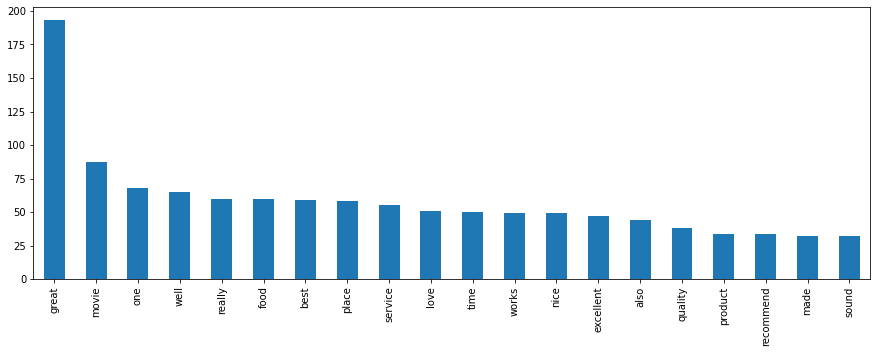

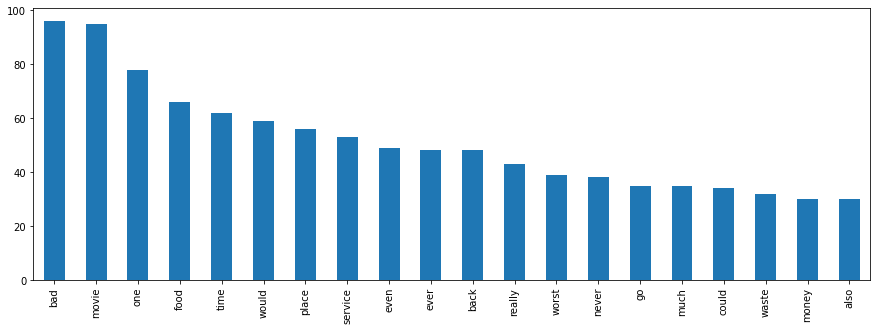

In [43]:
#visualization
split_df = [positive_review, negative_review]

for item in range(2):
    plt.figure(figsize = (15, 5))
    pd.Series(' '.join([i for i in split_df[item]]).split()).value_counts().head(20).plot(kind = 'bar')
    plt.show();

**B2. The tokenization process**

"Tokenization is the process of breaking down a piece of text into small units called tokens. A token may be a word, part of a word or just characters like punctuation." (Tal, 2021) The tokenization process is the foundation of NLP analysis. It defines and helps us understand the context of breaking down the text/sentence into the words/sentences called tokens for analysis. I use Scikit-Learn, TensorFlow, and Keras for the tokenization process. Please see the tokenization process below. The parameter was used:

* Vacab_size is training at 2200 words which is the maximum number of unique words used in the model
* embedding_dim is 16 dimensions
* max_length of each review limited to 100 words per customer review
* trunc_type is after 100 words, truncate type is 'post.'
* oov_tok is out of vocabulary to replace the unknown words
* padding_type is applied at the end of the review; padding type is 'post.'

In [44]:
#1. Split the data set
from sklearn.model_selection import train_test_split

# Set predictor and outcome variables
X = combine_df['clean_review']
y = combine_df['sentiments']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Print size of data splits
print('Shape of training set:', X_train.shape[0])
print('Shape of test set:', X_test.shape[0])

Shape of training set: 2198
Shape of test set: 550


In [45]:
#X,y = combine_df['review'].values,combine_df['sentiments'].values
#x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y, test_size = 0.20)

In [46]:
#2. Split the data set in 80/20 training and testing

split = round(len(combine_df)*0.8)
train_reviews = combine_df['clean_review'][:split]
train_label = combine_df['sentiments'][:split]
test_reviews = combine_df['clean_review'][split:]
test_label = combine_df['sentiments'][split:]

In [47]:
#3. After tokenization, set up the split 
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

for row in train_reviews:
    train_sentences.append(str(row))
for row in train_label:
    train_labels.append(row)
for row in test_reviews:
    test_sentences.append(str(row))
for row in test_label:
    test_labels.append(row)

In [48]:
#4. Set parameters for vocab
# Train at 2200 words
vocab_size = 2200

# 16 dimensions
embedding_dim = 16

# Max length of each review limited to 100 words per review
max_length = 100

# Truncating after 100 words 
trunc_type = 'post'
oov_tok = '<OOV>'

# Padding applied at the end of the review
padding_type = 'post'


In [49]:
# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Fit the tokenizer - train set
tokenizer.fit_on_texts(train_sentences)

# Word index
word_index = tokenizer.word_index

print('The vocab has ',str(len(word_index)),' words.')

The vocab has  4488  words.


**B3. Padding Process**

In this assignment, we use the Keras padding process and the post-argument to pad sentences at the end when we have a sentence length of fewer than 100 words.

In [50]:
#1. Setting sequences and padding
sequences = tokenizer.texts_to_sequences(train_sentences)

# Setting padding
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
test_sentences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sentences, maxlen=max_length)

In [51]:
#2. Pad the sentences
print("\nTraining sequences:\n", train_sentences)


Training sequences:
 ['way plug us unless go converter', 'good case excellent value', 'great jawbone', 'tied charger conversations lasting minutes major problems', 'mic great', 'jiggle plug get line right get decent volume', 'several dozen several hundred contacts imagine fun sending one one', 'razr owner must', 'needless say wasted money', 'waste money time', 'sound quality great', 'impressed going original battery extended battery', 'two seperated mere ft started notice excessive static garbled sound headset', 'good quality though', 'design odd ear clip comfortable', 'highly recommend one blue tooth phone', 'advise everyone fooled', 'far good', 'works great', 'works great', 'clicks place way makes wonder long mechanism would last', 'went motorola website followed directions could get pair', 'bought use kindle fire absolutely loved', 'commercials misleading', 'yet run new battery two bars three days without charging', 'bought mother problem battery', 'great pocket pc phone combinatio

**B4. Categories of Sentiment**

In this assignment, sentiment categories were 0 for negative and 1 for positive.

In [52]:
combine_df.groupby('sentiments').count()

,review,word_count,tokens_count,clean_review
sentiments,,,,
0,1362,1362,1362,1362
1,1386,1386,1386,1386


**B5. Steps to Prepare the Data**

**Step 1.There are steps for preparation**
1. Install necessary packages
2. Load three data set into Pandas data frame
3. Display data frame
4. Evaluate the data structure to understand input data better
* Review individual DataFrames info - Amazon
* Review individual DataFrames info - IMDB
* Review individual DataFrames info - Yelp
5. Combine the three review labeled files into one
6. Re-validate column, null values, and find missing values.
7. Check the combined data frames
* Check combined data frame info
* Check combined data frame columns
* Check combined data frame type
* Check data types of features
* Check binary rating (0 = negative, 1 = positive)
* Check positive and negative reviews from combined DataFrame
* Distribution of the ratings - sentiments
* Describe dataset statistics
* Checking for emoji "":D""
* Check for unusual characters
* Check vocabulary size, proposed word embedding length
* Find vocabulary size; and how many unique words are there in the Data Frame
* Check the length of unique words 
* Check the length of the shortest review
* Check the length of the longest review
* Total length of all reviews

8. Tokenize words by tokenize function
* Tokenize the text of the review
* Print first ten reviews
* Check word_tokens type
* Check sample review #6
* Count words in the reviews column
* Average word count in the reviews
* Count how many tokens in each tokenized review
* New 'tokens_count' feature for the length of each review
* Replace all capital with lowercase letters
* Remove all numbers from clean_review
* Replace all special characters (select list)
* Remove stop words
* Remove specific words that are in both positive and negative reviews
* Check sample review #6
* Visualization (positive and negative reviews)

**9. Prepared data set copy:** combine_df_prepared_nlp.csv (Step 4)

**Step 2. The tokenization process**
1. Split the data set
2. Split the data set in 80/20 training and testing
3. After tokenization, set up the split 
4. Set parameters for vocab
* Train at 2200 words
* 16 dimensions
* Max length of each review limited to 100 words per review
* Truncating after 100 words 
* Padding applied at the end of the review
* Tokenizer, Fit the tokenizer - train set

**Step 3. Padding Process**
1. Setting sequences, and padding
2. Padded sentences
3. Categories of Sentiment

**Step 4. Prepared data set copy: combine_df_prepared_nlp.csv**

**B6. Prepared Dataset**

In [53]:
# Prepared data set copy: combine_df_prepared_nlp.csv
for col in combine_df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(combine_df[col].value_counts())

combine_df.to_csv("combine_df_prepared_nlp.csv", index=False)
#combine_df.to_csv('nlp_cleaned_df.csv', index = False)

----------------------------------------review---------------------------------------- - 

10/10                                                                                                                    2
The food was terrible.                                                                                                   2
I would not recommend this place.                                                                                        2
I won't be back.                                                                                                         2
Great phone.                                                                                                             2
                                                                                                                        ..
You'll love how thin it is.                                                                                              1
Easily, none other cartoon made me laugh in a tender way (before getting into dark sitcoms oriented for teenagers).      1
I found a six in

----------------------------------------sentiments---------------------------------------- - 

1    1386
0    1362
Name: sentiments, dtype: int64

----------------------------------------word_count---------------------------------------- - 

4       203
5       180
7       173
6       159
8       156
10      152
3       150
11      144
12      139
9       133
2       106
14      101
13       99
15       97
16       86
17       83
20       71
19       70
21       69
18       65
23       45
22       40
24       38
25       37
26       22
28       16
27       14
1        12
31       10
30       10
34       10
29        9
33        8
32        7
38        4
35        4
36        3
45        3
40        2
43        2
47        2
53        1
71        1
199       1
51        1
797       1
62        1
39        1
37        1
302       1
42        1
54        1
56        1
1390      1
865       1
Name: word_count, dtype: int64

----------------------------------------tokens_count---------------------------------------- - 

5       186
6       179
8       159
7       156
9       147
13      145
12      141
11      140
4       126
10      124
14      100
3        95
15       95
16       94
17       94
18       81
19       77
21       75
22       71
20       62
24       52
23       50
26       43
25       38
27       30
28       25
29       20
30       19
31       17
32       16
33       13
39        7
34        7
2         6
36        6
42        6
41        5
35        5
37        4
40        4
38        3
47        2
45        2
43        2
1         2
50        2
52        2
46        1
348       1
56        1
62        1
80        1
49        1
55        1
69        1
73        1
229       1
923       1
1005      1
1625      1
Name: tokens_count, dtype: int64

----------------------------------------clean_review---------------------------------------- - 

great phone                                                                                                  8
disappointed                                                                                                 6
back                                                                                                         5
waste money                                                                                                  5
works great                                                                                                  4
                                                                                                            ..
place nice surprise                                                                                          1
hate writing bad reviews films especially really like star film bad believe one second anyone could proud    1
entire audience applauded conclusion film                                                                    1
a

# Part 3:  Network Architecture

**C1. Summary**

I create the Keras model by using TensorFlow. 

* Binary 0 and 1 for a negative and positive review.
* Embedding layer, in which we can define the chosen parameters.
* The GlobelAverragePooling1D is set to output for the 2D object.
* The Third layer is set to 'relu' activation with 10
* The fourth layer is set to 'relu' activation with 6
* The fifth layer is set to 'sigmoid' activation with 1

Please see below for the output of the function model from TensorFlow.

In [54]:
# Creating model with tensofFlow
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), 
    tf.keras.layers.GlobalAveragePooling1D(), 
    tf.keras.layers.Dense(10, activation='relu'), 
    tf.keras.layers.Dense(6, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

#tf.keras.layers.Dense(1, activation='sigmoid')
# tf.keras.layers.Dense(1, activation='softmax')

In [55]:
# Compile model, set loss function
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           35200     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 35,443
Trainable params: 35,443
Non-trainable params: 0
____________________________________________________

**C2. Network Architecture Discussion**

1. The number of layers: we used five layers in the model.

2. The type of layers: 

* The embedding layer (None, 100, 16), in which we can define the chosen parameters. The vocabulary size is 2200 words, the length of sentence maximum is 100 words, and the dimension is 16; the total of the parameter is 35200.
* The GlobelAverragePooling1D layer (None, 16) is set to output the 2D object; the total of the parameter is 0.
* The third layer is hidden (Dense) and set to 'relu' activation with 10; the total of the parameter is 170.
* The fourth layer is hidden (Dense) and set to 'relu' activation with 6; the total of the parameter is 66.
* The fifth layer is hidden (Dense) and set to 'sigmoid' activation with 1; the total of the parameter is 7.

3. Total number of parameters: The overall total of the parameter is 35443, the trainable parameter is 35443, and the non-trainable parameter is 0.

**C3. Justify Hyperparameters**

1. Activation functions we used 'relu' activation, which gives us better performance and generalizations with the larger datasets. According to Pius, the main idea of the 'relu' function is to perform a threshold operation to each input element where values less than zero are set to zero. (Pius, 2019). We use 'sigmoid' activation for the final layer which is equivalent in the binary classification problem.

2. Number of nodes per layer: we used ten nodes in the third hidden layer, six in the fourth, and one in the last layer.

3. Loss function: we used the binary_crossentropy loss function for probabilistic loss.

4. Optimizer: we used 'adam' optimizer. Adam is "an extension to the gradient descent optimization algorithm" and "designed to accelerate the optimization process, e.g., decrease the number of function evaluations required to reach the optima, or to improve the capability of the optimization algorithm." (Browlee, 2021)

5. Stopping criteria: we used the EarlyStopping hyperparameter to stop training the data set when performance begins to degrade. 

6. Evaluation metric: we used the 'accuracy' metric to see how the similarity of the measured value compares to the known value.

In [56]:
# Training the model- comfirm stopping creiteria with np arrays
train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)

# Part IV:  Model Evaluation

**D1. Impact of using stopping criteria**

First, we fit the model for 15 epochs.

In [57]:
# Import EarlyStopping function from Keras
#import tensorflow
#from keras.callbacks import ModelCheckpoint, EarlyStopping

In [58]:
# Fit the model for 15 epochs
epochs_num = 15

history_model1 = model.fit(padded, train_labels_final, epochs= epochs_num, 
                   validation_data=(test_padded, test_labels_final))

Epoch 1/15
69/69 [==============================] - 3s 14ms/step - loss: 0.6929 - accuracy: 0.5168 - val_loss: 0.6953 - val_accuracy: 0.4545
Epoch 2/15
69/69 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5168 - val_loss: 0.6945 - val_accuracy: 0.4545
Epoch 3/15
69/69 [==============================] - 1s 9ms/step - loss: 0.6912 - accuracy: 0.5168 - val_loss: 0.6953 - val_accuracy: 0.4545
Epoch 4/15
69/69 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5168 - val_loss: 0.6947 - val_accuracy: 0.4545
Epoch 5/15
69/69 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5168 - val_loss: 0.6908 - val_accuracy: 0.4545
Epoch 6/15
69/69 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.5678 - val_loss: 0.6832 - val_accuracy: 0.5091
Epoch 7/15
69/69 [==============================] - 0s 6ms/step - loss: 0.6590 - accuracy: 0.7284 - val_loss: 0.6651 - val_accuracy: 0.7509
Epoch 8/15
69/69 [=

We fit the model for 15 epochs, and we can see that the accuracy in the first epoch is 0.5168, and stay the same through the first to the fourth. The first loss is 0.6929 and begins to degrade in the second epoch as 0.6918. 
To prevent the overfitting, we use the EarlyStopping hyperparameter to stop training the data set when performance degrades.

In [59]:
# Fit the model for 15 epochs
epochs_num = 15

history_model2 = model.fit(padded, train_labels_final, epochs= epochs_num, 
                   validation_data=(test_padded, test_labels_final),
                         callbacks = EarlyStopping(monitor = 'val_loss')) 


Epoch 1/15
69/69 [==============================] - 0s 6ms/step - loss: 0.2137 - accuracy: 0.9272 - val_loss: 0.5480 - val_accuracy: 0.7218
Epoch 2/15
69/69 [==============================] - 0s 4ms/step - loss: 0.1922 - accuracy: 0.9368 - val_loss: 0.4619 - val_accuracy: 0.7927


The model now stop at 2, it mean that 2 is our optimal number of tests run. 
Our model prevents overfitting and stops at 2 epochs with an accuracy of 0.93, and the val_accuracy is 0.79 and a loss of 0.19. Our prediction model is 93% correct in predicting customer emotion based on words in reviews.

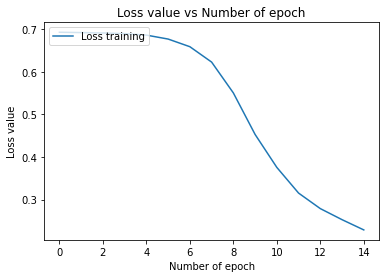

In [60]:
#Plot Loss (mean absolute error) and epoch
plt.plot(history_model1.history['loss'], label='Loss training')
plt.title('Loss value vs Number of epoch')
plt.ylabel('Loss value')
plt.xlabel('Number of epoch')
plt.legend(loc="upper left")
plt.show()

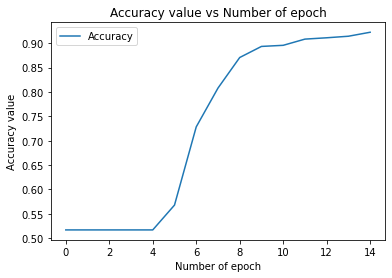

In [61]:
#Plot Accuracy and epoch
plt.plot(history_model1.history['accuracy'], label='Accuracy')
plt.title('Accuracy value vs Number of epoch')
plt.ylabel('Accuracy value')
plt.xlabel('Number of epoch')
plt.legend(loc="upper left")
plt.show()

**D2. Visualizations Training Process**

In [62]:
#Plot Accuracy and epoch
#plt.plot(history_model.history['accuracy'], label='Accuracy')
#plt.title('Accuracy value vs Number of epoch')
#plt.ylabel('Accuracy value')
#plt.xlabel('Number of epoch')
#plt.legend(loc="upper left")
#plt.show()

<Figure size 432x288 with 0 Axes>

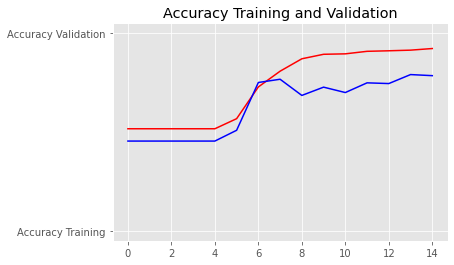

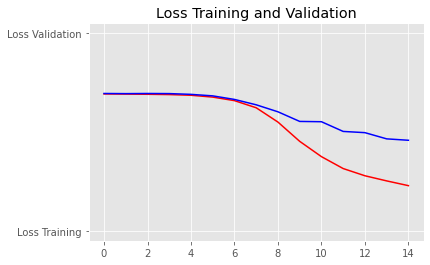

<Figure size 432x288 with 0 Axes>

In [63]:
# Visualize model and loss function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('ggplot')

acc = history_model1.history['accuracy']
val_acc = history_model1.history['val_accuracy']
loss = history_model1.history['loss']
val_loss = history_model1.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Accuracy Training')
plt.plot(epochs, val_acc, 'b', 'Accuracy Validation')
plt.title('Accuracy Training and Validation')
plt.figure()
plt.plot(epochs, loss, 'r', 'Loss Training')
plt.plot(epochs, val_loss, 'b', 'Loss Validation')
plt.title('Loss Training and Validation')
plt.figure()

In [64]:
# Evaluate the model
loss, accuracy = model.evaluate(padded, train_labels_final, verbose = 0)
print('Accuracy: %f' % (accuracy * 100))

Accuracy: 92.629665


**D3. Fitness of model**

Our vocabulary size is 2200, and the sentiment is simple, with 1 and 0 for positive and negative reviews. We used the EarlyStopping to prevent overfitting, increase the accuracy and degrade the loss. The model stop at 2, it mean that 2 is our optimal number of tests run. Our model prevents overfitting and stops at 2 epochs with an accuracy of 0.93, and the val_accuracy is 0.79. Our prediction model is 93% correct in predicting customer emotion based on words in reviews.

**D4. Predictive Accuracy**

We got a good model with an accuracy of 93%, the val_accuracy is 79%. Our prediction model is 93% correct in predicting customer emotion based on words in reviews. 

# Part V: Summary and Recommendations

**E. Code used**

Please see the code above and a Jupyter notebook pdf attached for all code.

**F. Functionality**

In this assignment, we will use the Python TensorFlow package to build the model to predict the sentiment of future customer reviews by the past given labeled datasets. The data analysis goals included analyzing and understanding the customers by identifying the customer's preferred product from positive product reviews. Our reserch question "Can we use neural networks and specifically Natural Language Processing (NLP) to predict the view of future customer reviews by the past sentiment labeled datasets?" Yes. Following the preparation and cleaning combined dataset, we build the sequential model with 5 layers. Seting the training and testing with the stop point help us to prevent the overfitting and increase the accuracy, we had the final prediction model with accuracy of 93% in predicting customer emotion. This is the good model outcome and we can use the model to predict positive or negative reivews. 


**G. Action**

Based on the result, the model accuracy is high at 93%. This is a good model to predict future customer reviews' sentiment. Based on the vocabulary size in the review, the business can predict the future rate and maybe identify the customer's preferred product from a positive review, then take action based on that.

# Part VI: Reporting

**H. Reporting**

Include in submission:

1. PDF file- Python Jupyter notebook (pdf)
2. Python Jupyter notebook presentation slides (slides, html)

**I. Sources for third-party code**

[1] MonkeyLearn. (n.d). Sentiment Analysis: A Definitive Guide. https://monkeylearn.com/sentiment-analysis/

[2] Gurita Tech. (2021, July 01). Tokenization in Python with NLTK - Python Tutorial. https://www.youtube.com/watch?v=-ugd4UrayPc

[3] Chugh Askask. (2018, November 04). Sentiment Analysis using Python. https://data-science-blog.com/en/blog/2018/11/04/sentiment-analysis-using-python/

[4] Anis Agmad. (n.d). Getting Started with Sentiment Analysis using Python. https://cnvrg.io/sentiment-analysis-python/

[5] KidAperture. (2021, September 21). D213-Advanced-Data-Analytics. https://github.com/KidAperture/D213-Advanced-Data-Analytics/blob/main/D213_task2.ipynb

**J. Acknowledge source**

[6] FreeCodeCamp.org. (2019, September 16). TensorFlow 2.0 Crash Course. https://www.youtube.com/watch?v=6g4O5UOH304

[7] FreeCodeCamp.org. (2020, March 03). TensorFlow 2.0 Complete Course - Python Neural Networks for Beginners Tutorial. https://www.youtube.com/watch?v=tPYj3fFJGjk

[8] Paul Sayak. (2021, May 17). Python Sentiment Analysis Tutorial. https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python

[9] Tal Perry. (2021, February 01). What is Tokenization in Natural Language Processing (NLP)?. https://www.machinelearningplus.com/nlp/what-is-tokenization-in-natural-language-processing/

[10] Pius Gadosey. (2019, Augurst 19). A beginner’s guide to NumPy with Sigmoid, ReLu and Softmax activation functions. https://medium.com/ai%C2%B3-theory-practice-business/a-beginners-guide-to-numpy-with-sigmoid-relu-and-softmax-activation-functions-25b840a9a272

[11] Brownlee Jason, (2021, January 13). Code Adam Optimization Algorithm From Scratch. https://machinelearningmastery.com/adam-optimization-from-scratch/